In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

***1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.***

In [8]:
def calc_logloss(y, y_pred):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [9]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0])
calc_logloss(y1, y_pred1)

9.999999722180686e-10

In [10]:
y1 = np.array([1, 0])
y_pred1 = np.array([0, 1])
calc_logloss(y1, y_pred1)

20.723265851087376

***2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.***

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

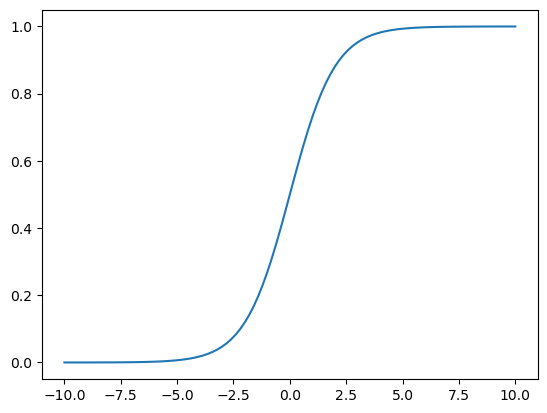

In [14]:
plt.plot(z, probabilities)
plt.show()

In [15]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    final_error = calc_logloss(y, y_pred)
    return W, final_error        

In [16]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


In [17]:
from tqdm import tqdm

In [18]:
np.logspace(2, 4, 4, dtype=np.int), np.linspace(1e-4, 5, 10)

(array([  100,   464,  2154, 10000]),
 array([1.00000000e-04, 5.55644444e-01, 1.11118889e+00, 1.66673333e+00,
        2.22227778e+00, 2.77782222e+00, 3.33336667e+00, 3.88891111e+00,
        4.44445556e+00, 5.00000000e+00]))

In [19]:
iterations = np.logspace(2, 4, 4, dtype=np.int)
etas = np.linspace(1e-4, 5, 10)

best_error = np.inf
best_params = {}

for iteration in tqdm(iterations):
    for eta in etas:
        W, error = eval_model(X_st, y, iterations=iteration, eta=eta)
        if error < best_error:
            best_error = error
            best_params = {
                'iteration': iteration,
                'eta': eta
            }

print(f'Ошибка {best_error} при параметрах {best_params}')

  0%|          | 0/4 [00:00<?, ?it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
10 [ 0.49629703 -0.13985959  0.6476583   1.52240734] 1.1760276523325583
20 [ 0.49591822 -0.14130855  0.64763059  1.5218419 ] 1.1734638242468702
30 [ 0.49553977 -0.14275628  0.64760267  1.5212769 ] 1.1709043612804575
40 [ 0.4951617  -0.14420277  0.64757454  1.52071236] 1.1683492744976867
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
70 [ 0.49402971 -0.14853473  0.64748888  1.51902148] 1.1607103813349897
80 [ 0.49365313 -0.1499762   0.6474599   1.51845877] 1.1581729091849757
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
0 [ 0.28590994 -0.94443548  0.63247476  1.20845383] 1.1785958344356262
10 [-0.01778729 -0.74259697  0.92060247  1.37876729] 0.4871224166857678
20 [-0.23016163 -0.77815411  0.9909963   1.53349338] 0.4728751686600379
30 [-0.40976737 -0.81459305  1.00520837  1.69017185] 0.46220990110

 50%|█████     | 2/4 [00:00<00:00,  8.91it/s]

0 [-0.97868771 -5.78059206  0.54120852 -0.67866266] 1.1785958344356262
0 [-1.18945398 -6.58661815  0.52599748 -0.99318207] 1.1785958344356262
0 [-1.40022026 -7.39264425  0.51078644 -1.30770149] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.28590994 -0.94443548  0.63247476  1.20845383] 1.1785958344356262
0 [ 0.07514367 -1.75046158  0.61726372  0.89393441] 1.1785958344356262
0 [-0.13562261 -2.55648768  0.60205268  0.579415  ] 1.1785958344356262
0 [-0.34638888 -3.36251377  0.58684164  0.26489558] 1.1785958344356262
0 [-0.55715516 -4.16853987  0.5716306  -0.04962383] 1.1785958344356262
0 [-0.76792143 -4.97456596  0.55641956 -0.36414324] 1.1785958344356262
0 [-0.97868771 -5.78059206  0.54120852 -0.67866266] 1.1785958344356262
0

 75%|███████▌  | 3/4 [00:01<00:00,  2.43it/s]

 [-1.18945398 -6.58661815  0.52599748 -0.99318207] 1.1785958344356262
0 [-1.40022026 -7.39264425  0.51078644 -1.30770149] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
2000 [ 0.42910538 -0.39762907  0.63899133  1.42101856] 0.7649678531356925
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
4000 [ 0.38047894 -0.5650296   0.63387164  1.35257212] 0.5836344091291391
5000 [ 0.36247418 -0.61238439  0.63568618  1.33181421] 0.5532531003505642
6000 [ 0.34723076 -0.64431226  0.63950668  1.31708294] 0.5382593304625718
7000 [ 0.33391048 -0.6662408   0.64455548  1.30646938] 0.5302255883714215
8000 [ 0.32196306 -0.68156712  0.65034185  1.29871977] 0.5254818665326442
9000 [ 0.3110257  -0.69240217  0.65656725  1.29301615] 0.5223831652167139
0 [ 0.28590994 -0.94443548  0.63247476  1.20845383] 1.1785958344356262
1000 [-7.90015752 -1.16909903 -1.52548197  6.893614

100%|██████████| 4/4 [00:04<00:00,  1.21s/it]

Ошибка 0.06501169697490264 при параметрах {'iteration': 10000, 'eta': 5.0}


In [20]:
W, error = eval_model(X_st, y, iterations=10000, eta=5)

0 [-1.40022026 -7.39264425  0.51078644 -1.30770149] 1.1785958344356262
1000 [-35.62255538  -3.59519667  -9.6056517   29.29054945] 0.10978759274085048
2000 [-41.37527762  -4.10212251 -11.2306732   33.90405266] 0.09826836932820042
3000 [-46.06565391  -4.50232372 -12.56475161  37.63379861] 0.09067806083051089
4000 [-50.13297814  -4.83643635 -13.73234248  40.83956573] 0.0850107717489422
5000 [-53.79308935  -5.12497171 -14.79343575  43.69897076] 0.08045036256303109
6000 [-57.16641298  -5.37996547 -15.7807227   46.31220979] 0.0765984981213237
7000 [-60.32572867  -5.60932407 -16.71332394  48.74101231] 0.07323658029352839
8000 [-63.31742028  -5.81867311 -17.60291611  51.02578454] 0.07023454400957989
9000 [-66.1722159   -6.01220331 -18.4568673   53.19411498] 0.0675102508813699


***3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).***

In [21]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [22]:
calc_pred_proba(W, X_st)

array([2.78422831e-01, 1.35803163e-04, 1.00000000e+00, 1.26327709e-13,
       9.84539392e-01, 1.24523221e-03, 1.00000000e+00, 3.01605650e-03,
       7.38013485e-01, 1.00000000e+00])

***4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).***

In [23]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    return y_pred

In [24]:
pred = calc_pred(W, X_st)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

***5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.***

*Accuracy*

In [25]:
def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

In [26]:
print(f'True \t  {y.astype(int)}')
print(f'Predicted {pred}')

True 	  [0 0 1 0 1 0 1 0 1 1]
Predicted [0 0 1 0 1 0 1 0 1 1]


In [27]:
accuracy(y, pred)

1.0

*Confusion Matrix*

In [28]:
def confusion_matrix(y, y_pred):
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] == 1: # TP
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 0: # TN
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 0: # FP
            cm[0][1] += 1
    return cm

In [29]:
cm = confusion_matrix(y, pred)
cm

array([[5., 0.],
       [0., 5.]])

*Precision*

In [30]:
def precision(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    precision = TP / (TP + FP)
    return precision

In [31]:
precision(y, pred)

1.0

*Recall*

In [32]:
def recall(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    recall = TP / (TP + FN)
    return recall

In [33]:
recall(y, pred)

1.0

*F-score*

In [34]:
def f_score(y, y_pred):
    pr = precision(y, y_pred)
    rec = recall(y, y_pred)
    f_score = 2 * pr * rec / (pr + rec)
    return f_score

In [35]:
f_score(y, pred)

1.0

***6. Могла ли модель переобучиться? Почему?***

Да, т.к. у нас маленький размер выборки (мало данных) и нет разделения на обучающую и тестовую выборку для проверки. Для снижения переобучения можно увеличить количество данных, уменьшить количество итераций, а также использовать L1 и L2 регуляризацию.